In [2]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

In [3]:
#Importar datos
df = pd.read_excel("Datos_importación.xlsx")
print(df)

     año  contenedores  bienes_servicios  consumo_final  poblacion
0   2001         51395          60756.37      137380.88   11899297
1   2002         57812          64568.69      150936.38   12190061
2   2003         55205          69941.34      163795.91   12484289
3   2004         57493          80180.25      179547.97   12781131
4   2005         53976          85156.34      199842.30   13080615
5   2006         60883          96270.20      220942.81   13381675
6   2007         73253         110811.52      251124.19   13684312
7   2008         91062         116593.99      290802.07   13988991
8   2009         89130         102031.16      295962.80   14296121
9   2010        105493         120943.49      321654.72   14605144
10  2011        119790         138605.36      354331.41   14916981
11  2012        119620         142549.42      380080.86   15231328
12  2013        118659         147359.20      410829.30   15548115
13  2014        123397         152377.82      439046.51   1586

In [4]:
df.describe()

,año,contenedores,bienes_servicios,consumo_final,poblacion
count,16.000000,16.000000,16.000000,16.000000,1.600000e+01
mean,2008.500000,90106.437500,111121.126875,297346.636250,1.416631e+07
std,4.760952,31413.314122,32156.763368,117629.697052,1.464589e+06
min,2001.000000,51395.000000,60756.370000,137380.880000,1.189930e+07
25%,2004.750000,57732.250000,83912.317500,194768.717500,1.300574e+07
50%,2008.500000,90096.000000,113702.755000,293382.435000,1.414256e+07
75%,2012.250000,119662.500000,142572.727500,387767.970000,1.531052e+07
max,2016.000000,138005.000000,152377.820000,495785.690000,1.651532e+07


In [5]:
df.corr()

,año,contenedores,bienes_servicios,consumo_final,poblacion
año,1.000000,0.967727,0.967259,0.995175,0.999883
contenedores,0.967727,1.000000,0.951386,0.975106,0.968288
bienes_servicios,0.967259,0.951386,1.000000,0.957909,0.965079
consumo_final,0.995175,0.975106,0.957909,1.000000,0.996330
poblacion,0.999883,0.968288,0.965079,0.996330,1.000000


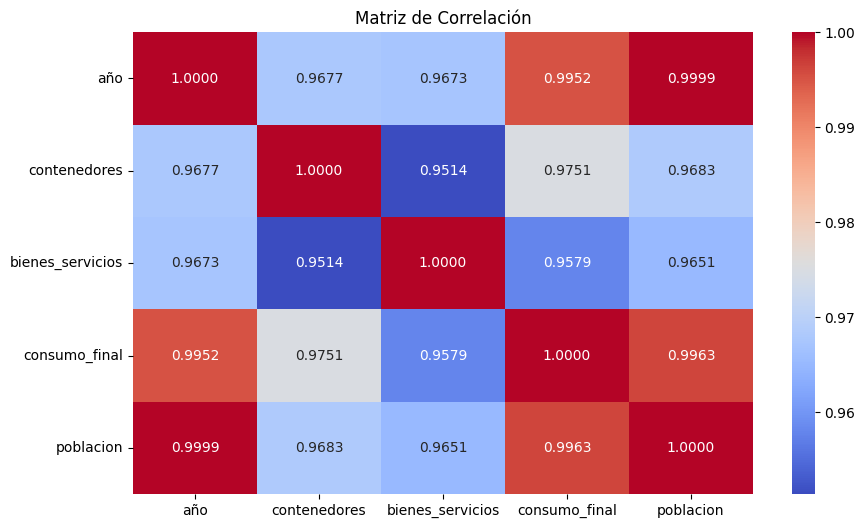

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Matriz de Correlación')  
plt.show()

In [7]:

# Variables x
x1 = df["bienes_servicios"].values
x2 = df["consumo_final"].values
x3 = df["poblacion"].values
# Variable a predecir
y = df["contenedores"].values


variables_x = np.column_stack((x1, x2, x3))  
variable_y = y  

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(variables_x, variable_y)  

# Resultados
print('\n=== RESULTADOS DEL MODELO ===')
print('Coeficientes:', modelo.coef_) 
print('Intercepción:', modelo.intercept_)

# Predicciones  R²
y_pred = modelo.predict(variables_x)

# Ecuación del modelo
print('\nEcuación del modelo:')
print(f'contenedores = {round(modelo.intercept_, 3)} + {round(modelo.coef_[0], 3)}*bienes_servicios + {round(modelo.coef_[1], 3)}*consumo_final + {round(modelo.coef_[2], 3)}*poblacion')

# Coeficiente de determinació
print('\nCoeficiente de determinación (R²):', round(r2_score(variable_y, y_pred), 3))

# Opcional: Calcular error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(variable_y, y_pred)
print('Error Cuadrático Medio (MSE):', round(mse, 2))


=== RESULTADOS DEL MODELO ===
Coeficientes: [ 0.32228638  0.42165938 -0.01980232]
Intercepción: 209440.49167798736

Ecuación del modelo:
contenedores = 209440.492 + 0.322*bienes_servicios + 0.422*consumo_final + -0.02*poblacion

Coeficiente de determinación (R²): 0.96
Error Cuadrático Medio (MSE): 37432627.93


Graficamos :

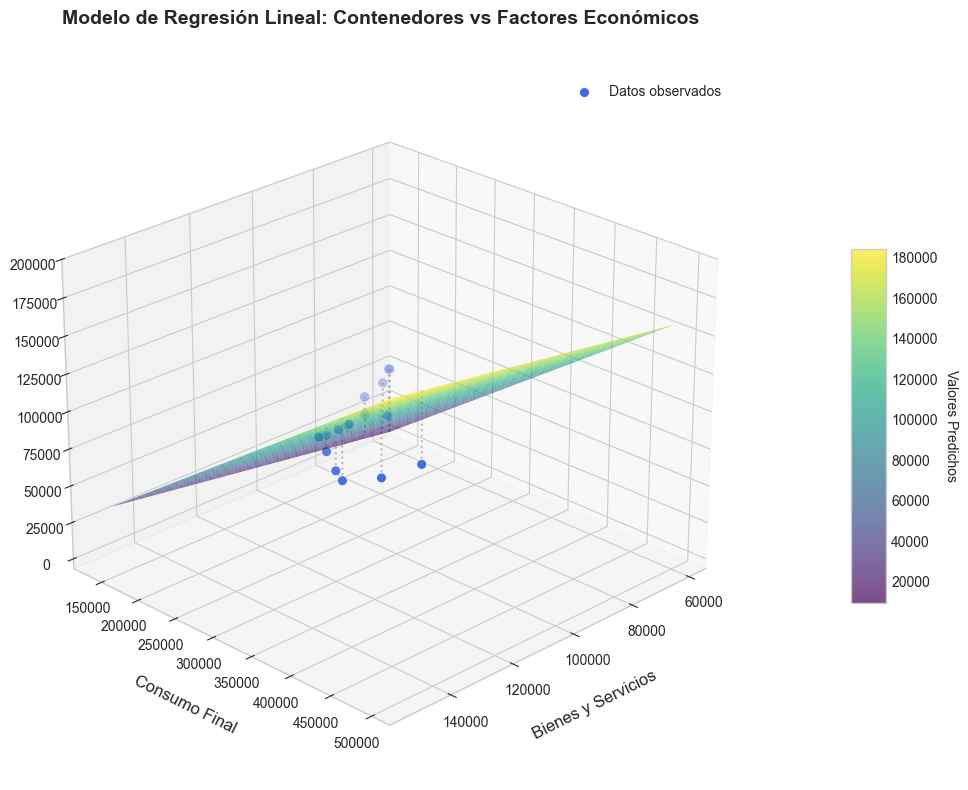

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuración del estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Crear figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Puntos de datos reales
scatter = ax.scatter(x1, x2, y, 
                    c='royalblue', 
                    s=50, 
                    depthshade=True,
                    label='Datos observados',
                    edgecolors='white',
                    linewidth=0.5)

# 2. Superficie de predicción
x1_range = np.linspace(x1.min(), x1.max(), 30)
x2_range = np.linspace(x2.min(), x2.max(), 30)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
x3_fixed = x3.mean()  # Valor fijo para la tercera variable

# Calcular predicciones
z_pred = (modelo.intercept_ + 
          modelo.coef_[0] * x1_mesh + 
          modelo.coef_[1] * x2_mesh + 
          modelo.coef_[2] * x3_fixed)

# Crear superficie
surface = ax.plot_surface(x1_mesh, x2_mesh, z_pred, 
                        cmap='viridis', 
                        alpha=0.7,
                        antialiased=True,
                        rstride=1, 
                        cstride=1)

# 3. Líneas de conexión (opcional)
for xi, yi, zi in zip(x1, x2, y):
    pred_z = (modelo.intercept_ + 
             modelo.coef_[0] * xi + 
             modelo.coef_[1] * yi + 
             modelo.coef_[2] * x3_fixed)
    ax.plot([xi, xi], [yi, yi], [zi, pred_z], 
            color='gray', 
            linestyle=':', 
            alpha=0.5)

# 4. Configuración de ejes y títulos
ax.set_xlabel('\nBienes y Servicios', linespacing=3, fontsize=12)
ax.set_ylabel('\nConsumo Final', linespacing=3, fontsize=12)
ax.set_zlabel('\nContenedores', linespacing=3, fontsize=12)

ax.set_title('Modelo de Regresión Lineal: Contenedores vs Factores Económicos\n', 
            fontsize=14, pad=20, fontweight='bold')

# 5. Barra de color para la superficie
cbar = fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Valores Predichos', rotation=270, labelpad=15)

# 6. Ángulo de vista y leyenda
ax.view_init(elev=25, azim=45)  # Ajustar ángulo de visualización
ax.legend(loc='upper right', fontsize=10, framealpha=1)

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()

Analisis estadístico de nuestro modelo: 

In [9]:
import statsmodels.api as sm


X_sm = sm.add_constant(variables_x)  
modelo_sm = sm.OLS(variable_y, X_sm).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     94.86
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.26e-08
Time:                        22:12:17   Log-Likelihood:                -162.21
No. Observations:                  16   AIC:                             332.4
Df Residuals:                      12   BIC:                             335.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.094e+05   1.66e+05      1.259      0.2

c:\Users\Cesar_2borgbt\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

# Usando fórmula (similar a R)
modelo_ols = ols('contenedores ~ bienes_servicios + consumo_final + poblacion', data=df).fit()
print(sm.stats.anova_lm(modelo_ols))

                    df        sum_sq       mean_sq           F        PR(>F)
bienes_servicios   1.0  1.339777e+10  1.339777e+10  268.437768  1.410911e-09
consumo_final      1.0  7.302871e+08  7.302871e+08   14.632030  2.416616e-03
poblacion          1.0  7.496064e+07  7.496064e+07    1.501911  2.438868e-01
Residual          12.0  5.989220e+08  4.991017e+07         NaN           NaN


In [11]:
import numpy as np

# Datos (según tu código)
x1 = df["bienes_servicios"].values
x2 = df["consumo_final"].values
x3 = df["poblacion"].values
y = df["contenedores"].values

# Modelo
variables_x = np.column_stack((x1, x2, x3))
modelo = LinearRegression()
modelo.fit(variables_x, y)
y_pred = modelo.predict(variables_x)

# --- Cálculo de residuos ---
residuos = y - y_pred  # Diferencia entre valores reales y predichos

# 1. DataFrame con resultados
df_resultados = pd.DataFrame({
    'Observado': y,
    'Predicho': y_pred,
    'Residual': residuos
})
print("\n=== Tabla de residuos (primeras filas) ===")
print(df_resultados)




=== Tabla de residuos (primeras filas) ===
    Observado       Predicho      Residual
0       51395   51315.698505     79.301495
1       57812   52502.359392   5309.640608
2       55205   53829.835883   1375.164117
3       57493   57893.540843   -400.540843
4       53976   62124.083577  -8148.083577
5       60883   68641.470911  -7758.470911
6       73253   80061.287648  -6808.287648
7       91062   92622.098211  -1560.098211
8       89130   84022.880215   5107.119785
9      105493   94831.933449  10661.066551
10     119790  108127.450479  11662.549521
11     119620  114031.264615   5588.735385
12     118659  122273.641860  -3614.641860
13     123397  129463.334363  -6066.334363
14     126530  132538.802051  -6008.802051
15     138005  137423.317998    581.682002


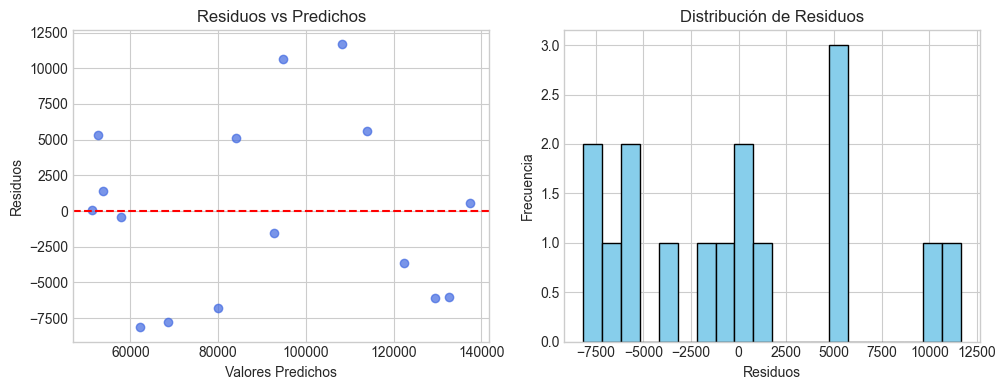

In [12]:
# 3. Gráficos diagnósticos
plt.figure(figsize=(10, 4))

# Gráfico 1: Residuos vs Predichos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.7, color='royalblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos')

# Gráfico 2: Histograma de residuos
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()

Supuestos 

Normalidad (shapiro-wilk): 

In [13]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuos)
print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test: Statistic=0.9344, p-value=0.2856


Homocedasticidad : 

In [14]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_with_const = sm.add_constant(variables_x)
bp_test = het_breuschpagan(residuos, X_with_const)
print(f"\nBreusch-Pagan Test: LM Statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")


Breusch-Pagan Test: LM Statistic=5.8697, p-value=0.1181


Independencia (Durbin-Whatson):

In [15]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuos)
print(f"- Durbin-Watson: {dw:.4f}")

print("\nInterpretación del estadístico Durbin-Watson:")
if dw < 1.5:
    print("-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)")
elif dw > 2.5:
    print("-> Posible autocorrelación NEGATIVA en los residuos (valor > 2.5)")
else:
    print("-> No hay evidencia de autocorrelación (valor cercano a 2)")

- Durbin-Watson: 0.6377

Interpretación del estadístico Durbin-Watson:
-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)


modelo pasimonioso

In [16]:
x_datos= df["consumo_final"].values
y_datos=df["contenedores"].values

Intercepto (β0): 12676.01
Coeficiente (β1): 0.26
MSE: 45486483.19
R²: 0.95


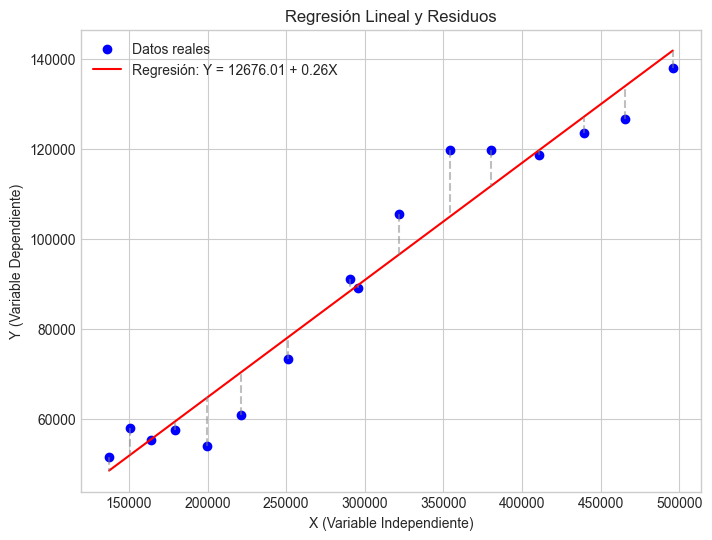

In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Datos
X = np.array(x_datos).reshape(-1, 1)
Y = np.array(y_datos)

# Entrenar modelo
model = LinearRegression()
model.fit(X, Y)

# Predicciones y errores
Y_pred = model.predict(X)
residuos = Y - Y_pred  #  (residuos)

# Métricas
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# Coeficientes
print(f"Intercepto (β0): {model.intercept_:.2f}")
print(f"Coeficiente (β1): {model.coef_[0]:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Gráfica
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, Y_pred, color='red', label=f'Regresión: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X')
plt.xlabel('X (Variable Independiente)')
plt.ylabel('Y (Variable Dependiente)')
plt.title('Regresión Lineal y Residuos')
plt.legend()

# Mostrar residuos como líneas verticales
for xi, yi, yp in zip(X, Y, Y_pred):
    plt.plot([xi, xi], [yi, yp], color='gray', linestyle='--', alpha=0.5)

plt.grid(True)
plt.show()

In [18]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)  
modelo_sm = sm.OLS(Y, X_sm).fit()

# Summary 
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     270.7
Date:               lun, 07 Jul. 2025   Prob (F-statistic):           1.49e-10
Time:                        23:20:02   Log-Likelihood:                -163.77
No. Observations:                  16   AIC:                             331.5
Df Residuals:                      14   BIC:                             333.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.268e+04   5039.247      2.515      0.0

c:\Users\Cesar_2borgbt\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

# Usando fórmula (similar a R)
modelo_ols = ols('contenedores ~  consumo_final ', data=df).fit()
print(sm.stats.anova_lm(modelo_ols))

                 df        sum_sq       mean_sq           F        PR(>F)
consumo_final   1.0  1.407416e+10  1.407416e+10  270.737368  1.487533e-10
Residual       14.0  7.277837e+08  5.198455e+07         NaN           NaN


In [20]:
# Tabla de errores (residuos)
tabla_errores = pd.DataFrame({
    'X': X.flatten(),
    'Y Real': Y,
    'Y Predicho': Y_pred,
    'Error (Residuo)': residuos,
    'Error Cuadrático': residuos**2
})

print("\nTabla de Errores:")
print(tabla_errores)


Tabla de Errores:
            X  Y Real     Y Predicho  Error (Residuo)  Error Cuadrático
0   137380.88   51395   48450.619206      2944.380794      8.669378e+06
1   150936.38   57812   51980.533721      5831.466279      3.400600e+07
2   163795.91   55205   55329.214448      -124.214448      1.542923e+04
3   179547.97   57493   59431.123285     -1938.123285      3.756322e+06
4   199842.30   53976   64715.860111    -10739.860111      1.153446e+08
5   220942.81   60883   70210.529914     -9327.529914      8.700281e+07
6   251124.19   73253   78069.900011     -4816.900011      2.320253e+07
7   290802.07   91062   88402.202363      2659.797637      7.074523e+06
8   295962.80   89130   89746.080179      -616.080179      3.795548e+05
9   321654.72  105493   96436.374253      9056.625747      8.202247e+07
10  354331.41  119790  104945.534545     14844.465455      2.203582e+08
11  380080.86  119620  111650.809696      7969.190304      6.350799e+07
12  410829.30  118659  119657.844823      -99

In [21]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuos)
print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test: Statistic=0.9744, p-value=0.9044


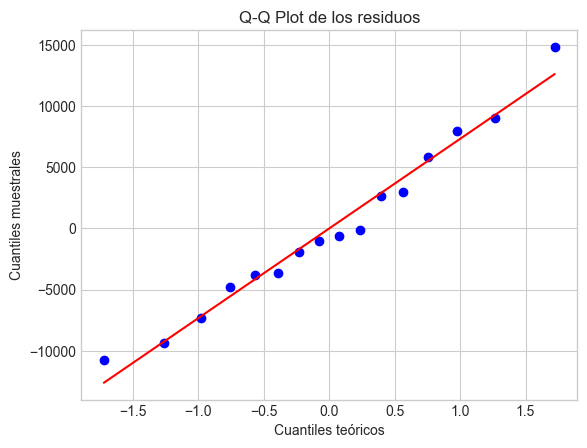

In [24]:
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles muestrales")
plt.grid(True)
plt.show()

In [22]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_with_const = sm.add_constant(x_datos)
bp_test = het_breuschpagan(residuos, X_with_const)
print(f"\nBreusch-Pagan Test: LM Statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")


Breusch-Pagan Test: LM Statistic=0.0916, p-value=0.7622


In [23]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuos)
print(f"- Durbin-Watson: {dw:.4f}")

print("\nInterpretación del estadístico Durbin-Watson:")
if dw < 1.5:
    print("-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)")
elif dw > 2.5:
    print("-> Posible autocorrelación NEGATIVA en los residuos (valor > 2.5)")
else:
    print("-> No hay evidencia de autocorrelación (valor cercano a 2)")

- Durbin-Watson: 0.6898

Interpretación del estadístico Durbin-Watson:
-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)
